<a href="https://colab.research.google.com/github/jahidhasan299/Data-Science-End-to-End-50-Projects-/blob/main/Image_Watermarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Steps to solve the problem:
1. Loading the image and logo form url's.
2. Resizing the images
3. Converting images into RGB format and then convert it into numpy array.
4. Storing the height and width of the image and logo
5. Finding the coornidates of the center of the image.
6. Finding out the region of interest to draw logo.
7. Merging the logo with the image and visualizing it.
8. Creating the text Watermark.
9. Using CV2 function to define thext properties and applying it at specific coordinates.
10. Converting the image into RGB and Visualizing it.

# Useful of Image_Watermarking
1. Adding a watermarking to an image works as copyright. Different organizations can use it to make their content secure so that their content cannot be misused without their licence or a paid version. In this project, We will saw how easily we can use OpenCV to add watermarks to our images.

2. In this project, we will see how we can add a watermark to an image. Adding a watermark works as a copyright for your image, so that no one can illegally use your image or document. We will use OpenCV for this project to add logo and text as a watermark.

In [69]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

We will start by importing required libraries like OpenCV for image processing, numpy for mathematical computation, etc.

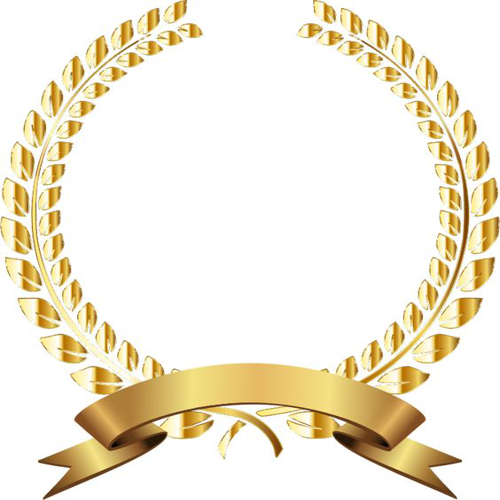

In [70]:
# Reading image form url
image = Image.open(requests.get('https://i.pinimg.com/564x/8a/04/a6/8a04a6bfc350e65eb4d43ac72c118f49.jpg', stream=True).raw)
image_logow = image.resize((500,500))
image_textw = image.resize((500,500))
image_logow

For this project we need an image url on which we will apply watermark. We will load the image using the url of the image from google images. You can use any image that you desire and replace the url of the image with current url. Next we will read and resize the image and finally store it into two variables for logo and text watermarking.

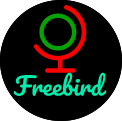

In [71]:
# Reading logo form url
logo = Image.open(r"/content/drive/MyDrive/Colab Notebooks/Data Science End-to-End [50] Project/Files/Freebird.png") 
logo

For logo we are using Pianalytix logo which is downloaded using the above url.

In [72]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In order to use these images we will first convert them into rbg format and store it as a numpy array. Similarly, we will also extract the shape i.e. it's height and width. 

In [73]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

We will place our watermark in the center of the image so for that we need to calculate the center of the image. Here, we will find out the center coordinates of the image using height and width of the image. 

In [80]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 0.5, logo, 0.5, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (255, 0, 0), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

A Region of Interest defined as the area we need to place our watermark on. Here, we will find out ROI using the coordinates we found above. Next we will use OpenCV to merge our logo on ROI. Similarly we will also add a line or a pattern on our image.

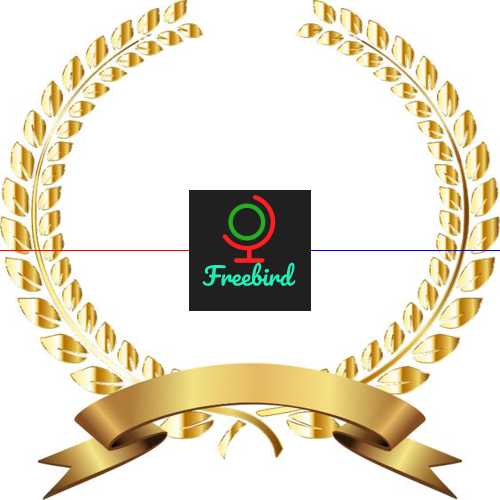

In [81]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

Now we will convert the image from array to RGB and visualize it.

In [94]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='FreeBird', org=(w_image - 90, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(255,0,0), thickness=1, lineType=cv2.LINE_4); 

Next we shall see how we can use a text as a watermark. We will convert our image into RGB and save it as a numpy array. To put a text as a watermark we will be using putText() function of OpenCV. Here we can use different features like size of the text, thickness of the text, font family, etc.

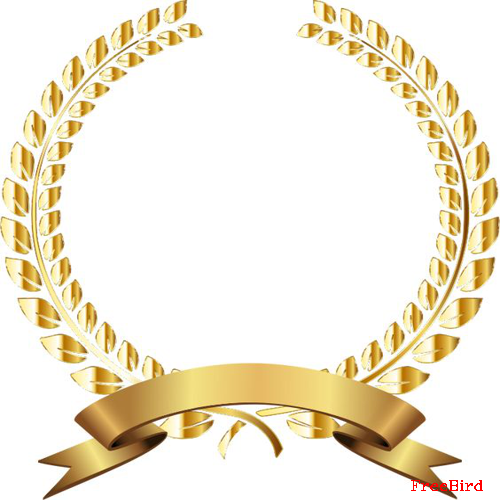

In [95]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg

To visualize the image we need to convert it back to RGB format.

## Conclusion:

Adding a watermark to an image works as a copyright. Different organizations can use it to make their content secure so that their content cannot be misused without thier license or a paid version. In this project we saw how easily we can use OpenCV to add watermarks to our images. 